In [1]:
# Importing Libraries
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math, copy

In [2]:
# Selecting styles for plotting
print(plt.style.available)
plt.style.use('dark_background')

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [181]:
# Datasets
x_train = np.array([1.0, 2.0, 2.3, 2.5, 2.6, 2.8, 3.1, 3.5, 3.7, 2.2, 4.5, 1.9])
y_train = np.array([23.44, 33.44, 34.50, 36.70, 37.12, 40.02, 42.35, 45.50, 47.60, 33.70, 52.30, 30.10])
print(f"No. of Employees: {x_train}")
print(f"Size of Company: {y_train}")

No. of Employees: [1.  2.  2.3 2.5 2.6 2.8 3.1 3.5 3.7 2.2 4.5 1.9]
Size of Company: [23.44 33.44 34.5  36.7  37.12 40.02 42.35 45.5  47.6  33.7  52.3  30.1 ]


In [182]:
# Tabulating the Data
my_dict = {"No. of Emplyees": x_train, "Company Size": y_train}
dataframe = pd.DataFrame(my_dict)
display(dataframe)

,No. of Emplyees,Company Size
0,1.0,23.44
1,2.0,33.44
2,2.3,34.50
3,2.5,36.70
4,2.6,37.12
5,2.8,40.02
6,3.1,42.35
7,3.5,45.50
8,3.7,47.60
9,2.2,33.70


In [183]:
# Computing Training examples
m = x_train.shape[0]
print(f"Number of training Examples: {m}")

Number of training Examples: 12


In [184]:
# Printing training examples as coordinate format
for i in range(m):
    x_i = x_train[i]
    y_i = y_train[i]
    print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")

(x^(0), y^(0)) = (1.0, 23.44)
(x^(1), y^(1)) = (2.0, 33.44)
(x^(2), y^(2)) = (2.3, 34.5)
(x^(3), y^(3)) = (2.5, 36.7)
(x^(4), y^(4)) = (2.6, 37.12)
(x^(5), y^(5)) = (2.8, 40.02)
(x^(6), y^(6)) = (3.1, 42.35)
(x^(7), y^(7)) = (3.5, 45.5)
(x^(8), y^(8)) = (3.7, 47.6)
(x^(9), y^(9)) = (2.2, 33.7)
(x^(10), y^(10)) = (4.5, 52.3)
(x^(11), y^(11)) = (1.9, 30.1)


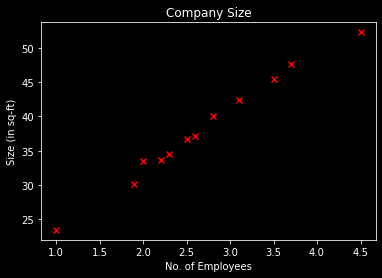

In [185]:
# Plotting Data points
plt.scatter(x_train, y_train, marker = 'x', c = 'r')
# Set the title
plt.title("Company Size")
# Set the y-axis label
plt.ylabel('Size (in sq-ft)')
# Set the x-axis label
plt.xlabel('No. of Employees')
plt.show()

In [285]:
# Parameters
weight = 13
scale = 2
print(f"The weight is: {weight}")
print(f"The scale is: {scale}")

The weight is: 13
The scale is: 2


In [286]:
# Designing Model
def model_design(x,w,b):
    examples = x.shape[0]
    f_wb = np.zeros(examples)
    for i in range(examples):
        f_wb[i] = w * x[i] + b
    return f_wb

In [287]:
# Linear regression intuition
my_model = model_design(x_train, weight, scale)
print(my_model)

[15.  28.  31.9 34.5 35.8 38.4 42.3 47.5 50.1 30.6 60.5 26.7]


In [288]:
# Tabulating feature and corresponding output function values (Prediction curve)
func_dic = {"X":x_train, "F_WB(X)": my_model}
dataframe_new = pd.DataFrame(func_dic)
display(dataframe_new)

,X,F_WB(X)
0,1.0,15.0
1,2.0,28.0
2,2.3,31.9
3,2.5,34.5
4,2.6,35.8
5,2.8,38.4
6,3.1,42.3
7,3.5,47.5
8,3.7,50.1
9,2.2,30.6


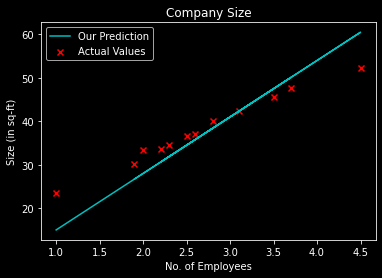

In [289]:
#Plotting model
plt.plot(x_train, my_model, c='c',label='Our Prediction')
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
# Set the title
plt.title("Company Size")
# Set the y-axis label
plt.ylabel('Size (in sq-ft)')
# Set the x-axis label
plt.xlabel('No. of Employees')
plt.legend()
plt.show()

In [290]:
# Predicting wrt to manually set parameters
x_i = 277
emp_277 = weight * x_i + scale
print(f"The size of company for accomodation of {x_i} employees is: {emp_277}")

The size of company for accomodation of 277 employees is: 3603


In [291]:
# The above Prediction curve is not a good fit as seen from the above plot
# Hence using technique of gradient descent to find the parameters values
# Cost Function
def compute_cost(x,y,w,b):
    examples = x.shape[0]
    cumulative_cost = 0
    for i in range(examples):
        fun = w * x[i] + b
        cost = (fun - y[i])**2
        cumulative_cost = cumulative_cost + cost
    total_cost = (1/2 * m) * cumulative_cost
    return total_cost

In [292]:
# Computing cost at manually set parameters
model_cost = compute_cost(x_train, y_train, weight, scale)
print(f"Model cost is: {model_cost / 100}")

Model cost is: 12.927390000000004


In [293]:
# Computing Gradient
def compute_gradient(x, y, w, b):
    eg = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(eg):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [294]:
# Gradient Descent
def gradient_descent(x,y,w_in,b_in,alpha,num_iters,cost_fun,gradient_fun):
    w = copy.deepcopy(w_in)
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    for i in range(num_iters):
        # Calculate Gradient and update parameters
        dj_dw, dj_db = gradient_fun(x,y,w,b)
        # Updating parameters
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw
    return w, b

In [300]:
# Initialization
weight_init = 0
scale_init = 0
# some gradient descent settings
iterations = 1000
tmp_alpha = 0.001
# Running Gradient Descent
w_final, b_final = gradient_descent(x_train ,y_train, weight_init, scale_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:.2f},{b_final:.2f})")

(w,b) found by gradient descent: (11.97,5.13)


In [307]:
# New Parameters
final_weight = round(w_final)
final_scale = round(b_final)
print(f"Final Weight is: {final_weight}")
print(f"Final Scale is: {final_scale}")
# Plotting Line Regression plot for new updated parameters
fit_model = model_design(x_train, final_weight, final_scale)
# Cost of model
fit_model_cost = compute_cost(x_train, y_train, final_weight, final_scale)
print(f"The Fitted Cost is (scaling down by 100): {round(fit_model_cost / 100)}")

Final Weight is: 12
Final Scale is: 5
The Fitted Cost is (scaling down by 100): 8


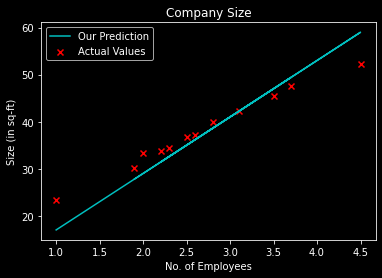

In [308]:
# Plotting the Fitted model
plt.plot(x_train, fit_model, c='c',label='Our Prediction')
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
# Set the title
plt.title("Company Size")
# Set the y-axis label
plt.ylabel('Size (in sq-ft)')
# Set the x-axis label
plt.xlabel('No. of Employees')
plt.legend()
plt.show()

In [309]:
# Testing the model
Employees = 277
size = final_weight * Employees + final_scale
print(f"The size of company for accomodation of {x_i} employees is: {size}")

The size of company for accomodation of 277 employees is: 3329
